***Import libraires and data, set up stuff***

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
#import anndata2ri

In [5]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
#anndata2ri.activate()
%load_ext rpy2.ipython

In [6]:
plt.rcParams['figure.figsize']=(6,6) #rescale figures

In [12]:
from os import listdir
from os.path import isfile, join

In [53]:
mypath1 = '../../results_5e5/out_fst/'
fileLists = [mypath1+f.split('.')[0]+'.'+f.split('.')[1]+'.fst.txt' for f in listdir(mypath1) if isfile(join(mypath1, f))]
fileLists = np.unique(fileLists)
dataName = [f.split('.')[0]+'.'+f.split('.')[1] for f in listdir(mypath1) if isfile(join(mypath1, f))]
dataName = np.unique(dataName)
colName_1 = [f.split('.')[0] for f in listdir(mypath1) if isfile(join(mypath1, f))]
colName_2 = [f.split('.')[1] for f in listdir(mypath1) if isfile(join(mypath1, f))]
colName = np.unique(colName_1+colName_2)

In [54]:
colName

array(['ATR', 'BUR', 'CON', 'COR', 'LAG', 'RB_2000', 'RB_2006', 'RB_2016',
       'SK_1913', 'SK_1932', 'SK_1938', 'SK_1945', 'SK_1955', 'SK_1992',
       'SK_1999', 'SK_2008', 'SK_2015', 'SN_1913', 'ST_1913', 'ST_1936',
       'ST_1945', 'ST_1955', 'ST_2000', 'ST_2005', 'ST_2010', 'VA_1913',
       'VA_1945', 'VA_2000', 'VA_2006', 'VA_2016'], dtype='<U7')

In [55]:
data = pd.DataFrame(index=colName, columns=colName)

In [56]:
colName

array(['ATR', 'BUR', 'CON', 'COR', 'LAG', 'RB_2000', 'RB_2006', 'RB_2016',
       'SK_1913', 'SK_1932', 'SK_1938', 'SK_1945', 'SK_1955', 'SK_1992',
       'SK_1999', 'SK_2008', 'SK_2015', 'SN_1913', 'ST_1913', 'ST_1936',
       'ST_1945', 'ST_1955', 'ST_2000', 'ST_2005', 'ST_2010', 'VA_1913',
       'VA_1945', 'VA_2000', 'VA_2006', 'VA_2016'], dtype='<U7')

In [57]:
for fileName, name in zip(fileLists, dataName):
    fst = pd.read_csv(fileName, sep='\t', header=None).loc[0,1]
    xName = name.split('.')[0]
    yName = name.split('.')[1]
    data.loc[xName,yName] = fst

In [46]:
fileLists

array(['../../results_5e5/out_fst/ATR.BUR.fst.txt',
       '../../results_5e5/out_fst/ATR.RB_2006.fst.txt',
       '../../results_5e5/out_fst/ATR.SK_2008.fst.txt',
       '../../results_5e5/out_fst/ATR.ST_1955.fst.txt',
       '../../results_5e5/out_fst/BUR.RB_2006.fst.txt',
       '../../results_5e5/out_fst/BUR.ST_1955.fst.txt',
       '../../results_5e5/out_fst/CON.ATR.fst.txt',
       '../../results_5e5/out_fst/CON.BUR.fst.txt',
       '../../results_5e5/out_fst/CON.RB_2006.fst.txt',
       '../../results_5e5/out_fst/CON.RB_2016.fst.txt',
       '../../results_5e5/out_fst/CON.SK_1992.fst.txt',
       '../../results_5e5/out_fst/CON.SK_2008.fst.txt',
       '../../results_5e5/out_fst/CON.ST_1913.fst.txt',
       '../../results_5e5/out_fst/CON.ST_1936.fst.txt',
       '../../results_5e5/out_fst/CON.ST_1945.fst.txt',
       '../../results_5e5/out_fst/CON.ST_1955.fst.txt',
       '../../results_5e5/out_fst/CON.ST_2000.fst.txt',
       '../../results_5e5/out_fst/CON.VA_2006.fst.txt',
    

In [59]:
Fst_dataframe = data.fillna(0) + data.fillna(0).T

make 2D matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text major ticklabel objects>)

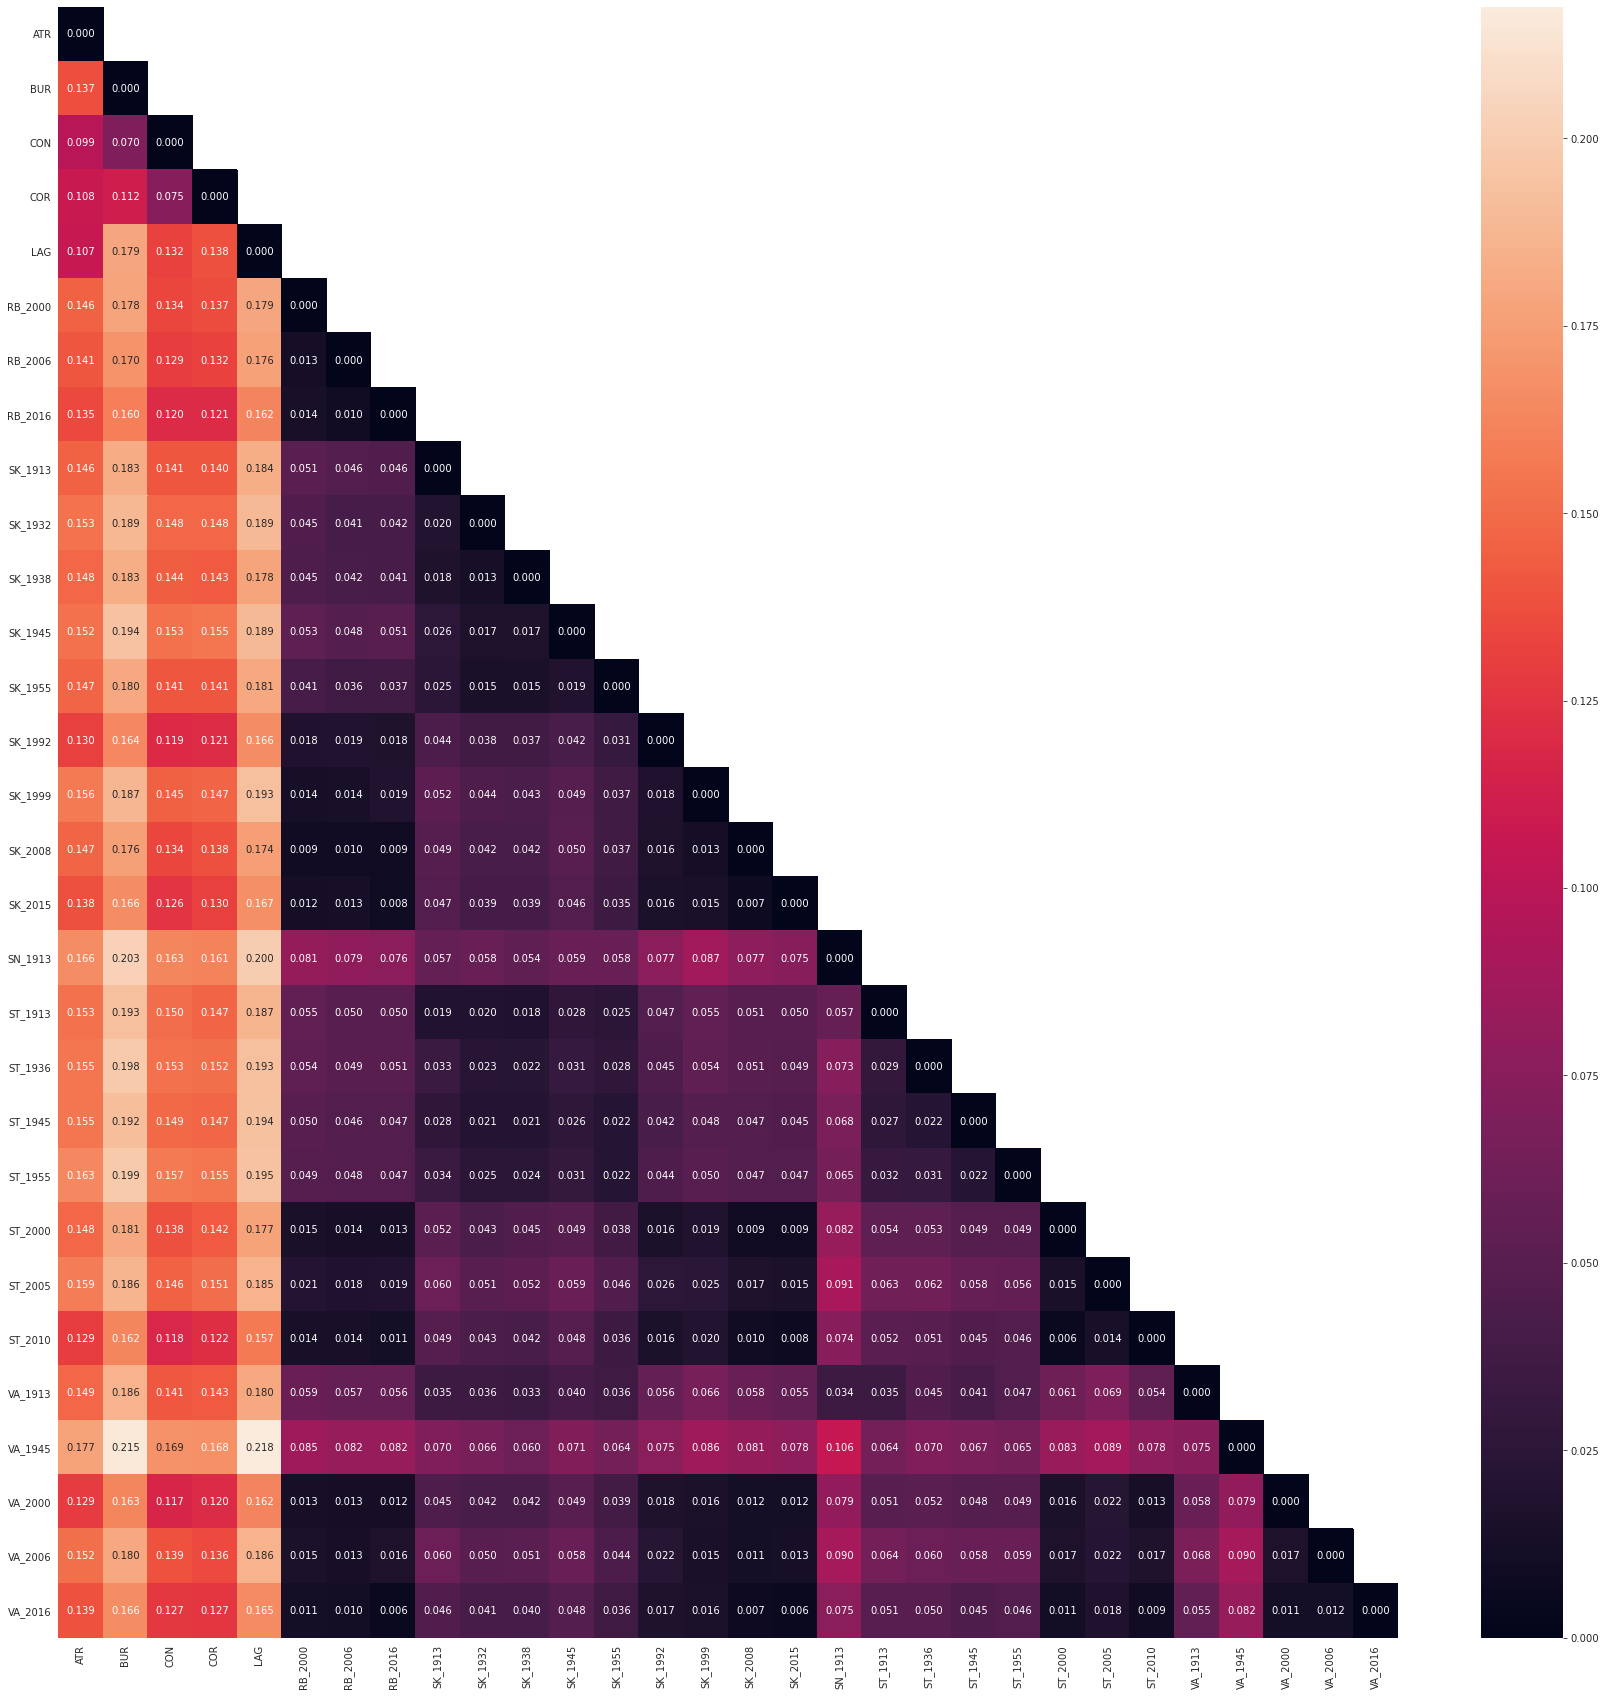

In [60]:
mask = np.zeros_like(Fst_dataframe)
mask[np.triu_indices_from(Fst_dataframe,1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,30))
    ax = sns.heatmap(Fst_dataframe, annot=True, fmt=".3f", mask=mask)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#plt.rcParams['figure.figsize']=(20,20) #rescale figures
#sns.heatmap(dfW)

In [61]:
!mkdir ../../results_5e5/fst_matrix

In [62]:
Fst_dataframe.to_csv('../../results_5e5/fst_matrix/Fst_5e5.csv', sep='\t')

Redo with SNP threshold 5e-6

In [63]:
mypath1 = '../../results_5e6/out_fst/'
fileLists = [mypath1+f.split('.')[0]+'.'+f.split('.')[1]+'.fst.txt' for f in listdir(mypath1) if isfile(join(mypath1, f))]
fileLists = np.unique(fileLists)
dataName = [f.split('.')[0]+'.'+f.split('.')[1] for f in listdir(mypath1) if isfile(join(mypath1, f))]
dataName = np.unique(dataName)
colName_1 = [f.split('.')[0] for f in listdir(mypath1) if isfile(join(mypath1, f))]
colName_2 = [f.split('.')[1] for f in listdir(mypath1) if isfile(join(mypath1, f))]
colName = np.unique(colName_1+colName_2)

In [64]:
colName

array(['ATR', 'BUR', 'CON', 'COR', 'LAG', 'RB_2000', 'RB_2006', 'RB_2016',
       'SK_1913', 'SK_1932', 'SK_1938', 'SK_1945', 'SK_1955', 'SK_1992',
       'SK_1999', 'SK_2008', 'SK_2015', 'SN_1913', 'ST_1913', 'ST_1936',
       'ST_1945', 'ST_1955', 'ST_2000', 'ST_2005', 'ST_2010', 'VA_1913',
       'VA_1945', 'VA_2000', 'VA_2006', 'VA_2016'], dtype='<U7')

In [65]:
data = pd.DataFrame(index=colName, columns=colName)

In [66]:
colName

array(['ATR', 'BUR', 'CON', 'COR', 'LAG', 'RB_2000', 'RB_2006', 'RB_2016',
       'SK_1913', 'SK_1932', 'SK_1938', 'SK_1945', 'SK_1955', 'SK_1992',
       'SK_1999', 'SK_2008', 'SK_2015', 'SN_1913', 'ST_1913', 'ST_1936',
       'ST_1945', 'ST_1955', 'ST_2000', 'ST_2005', 'ST_2010', 'VA_1913',
       'VA_1945', 'VA_2000', 'VA_2006', 'VA_2016'], dtype='<U7')

In [67]:
for fileName, name in zip(fileLists, dataName):
    fst = pd.read_csv(fileName, sep='\t', header=None).loc[0,1]
    xName = name.split('.')[0]
    yName = name.split('.')[1]
    data.loc[xName,yName] = fst

In [69]:
Fst_dataframe_2 = data.fillna(0) + data.fillna(0).T

make 2D matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text major ticklabel objects>)

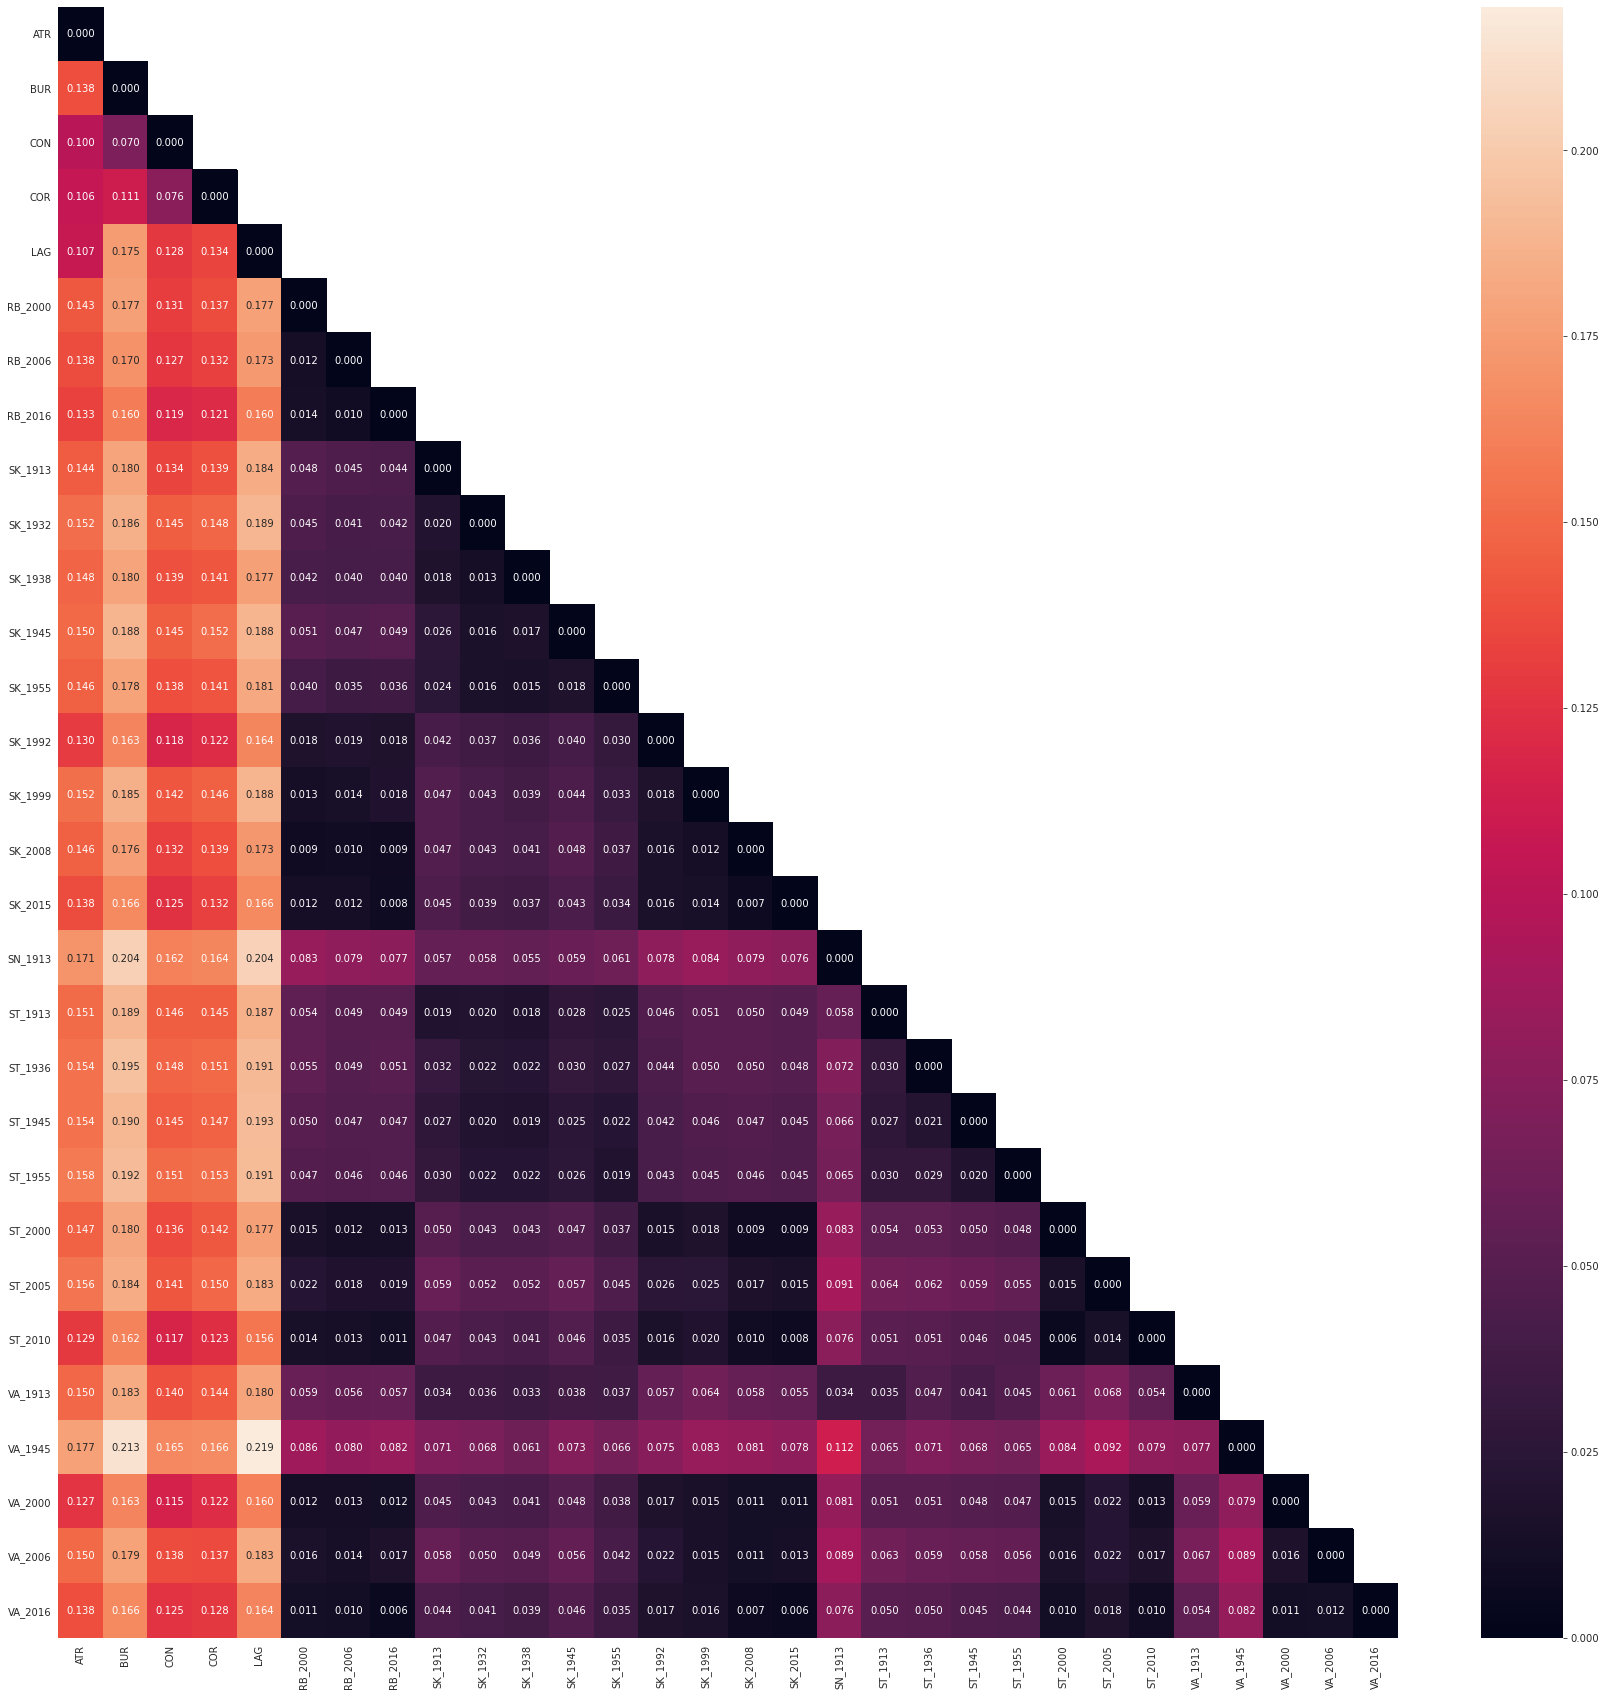

In [70]:
mask = np.zeros_like(Fst_dataframe_2)
mask[np.triu_indices_from(Fst_dataframe_2,1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,30))
    ax = sns.heatmap(Fst_dataframe_2, annot=True, fmt=".3f", mask=mask)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#plt.rcParams['figure.figsize']=(20,20) #rescale figures
#sns.heatmap(dfW)

In [71]:
!mkdir ../../results_5e6/fst_matrix

In [72]:
Fst_dataframe.to_csv('../../results_5e6/fst_matrix/Fst_5e6.csv', sep='\t')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]),
 <a list of 30 Text major ticklabel objects>)

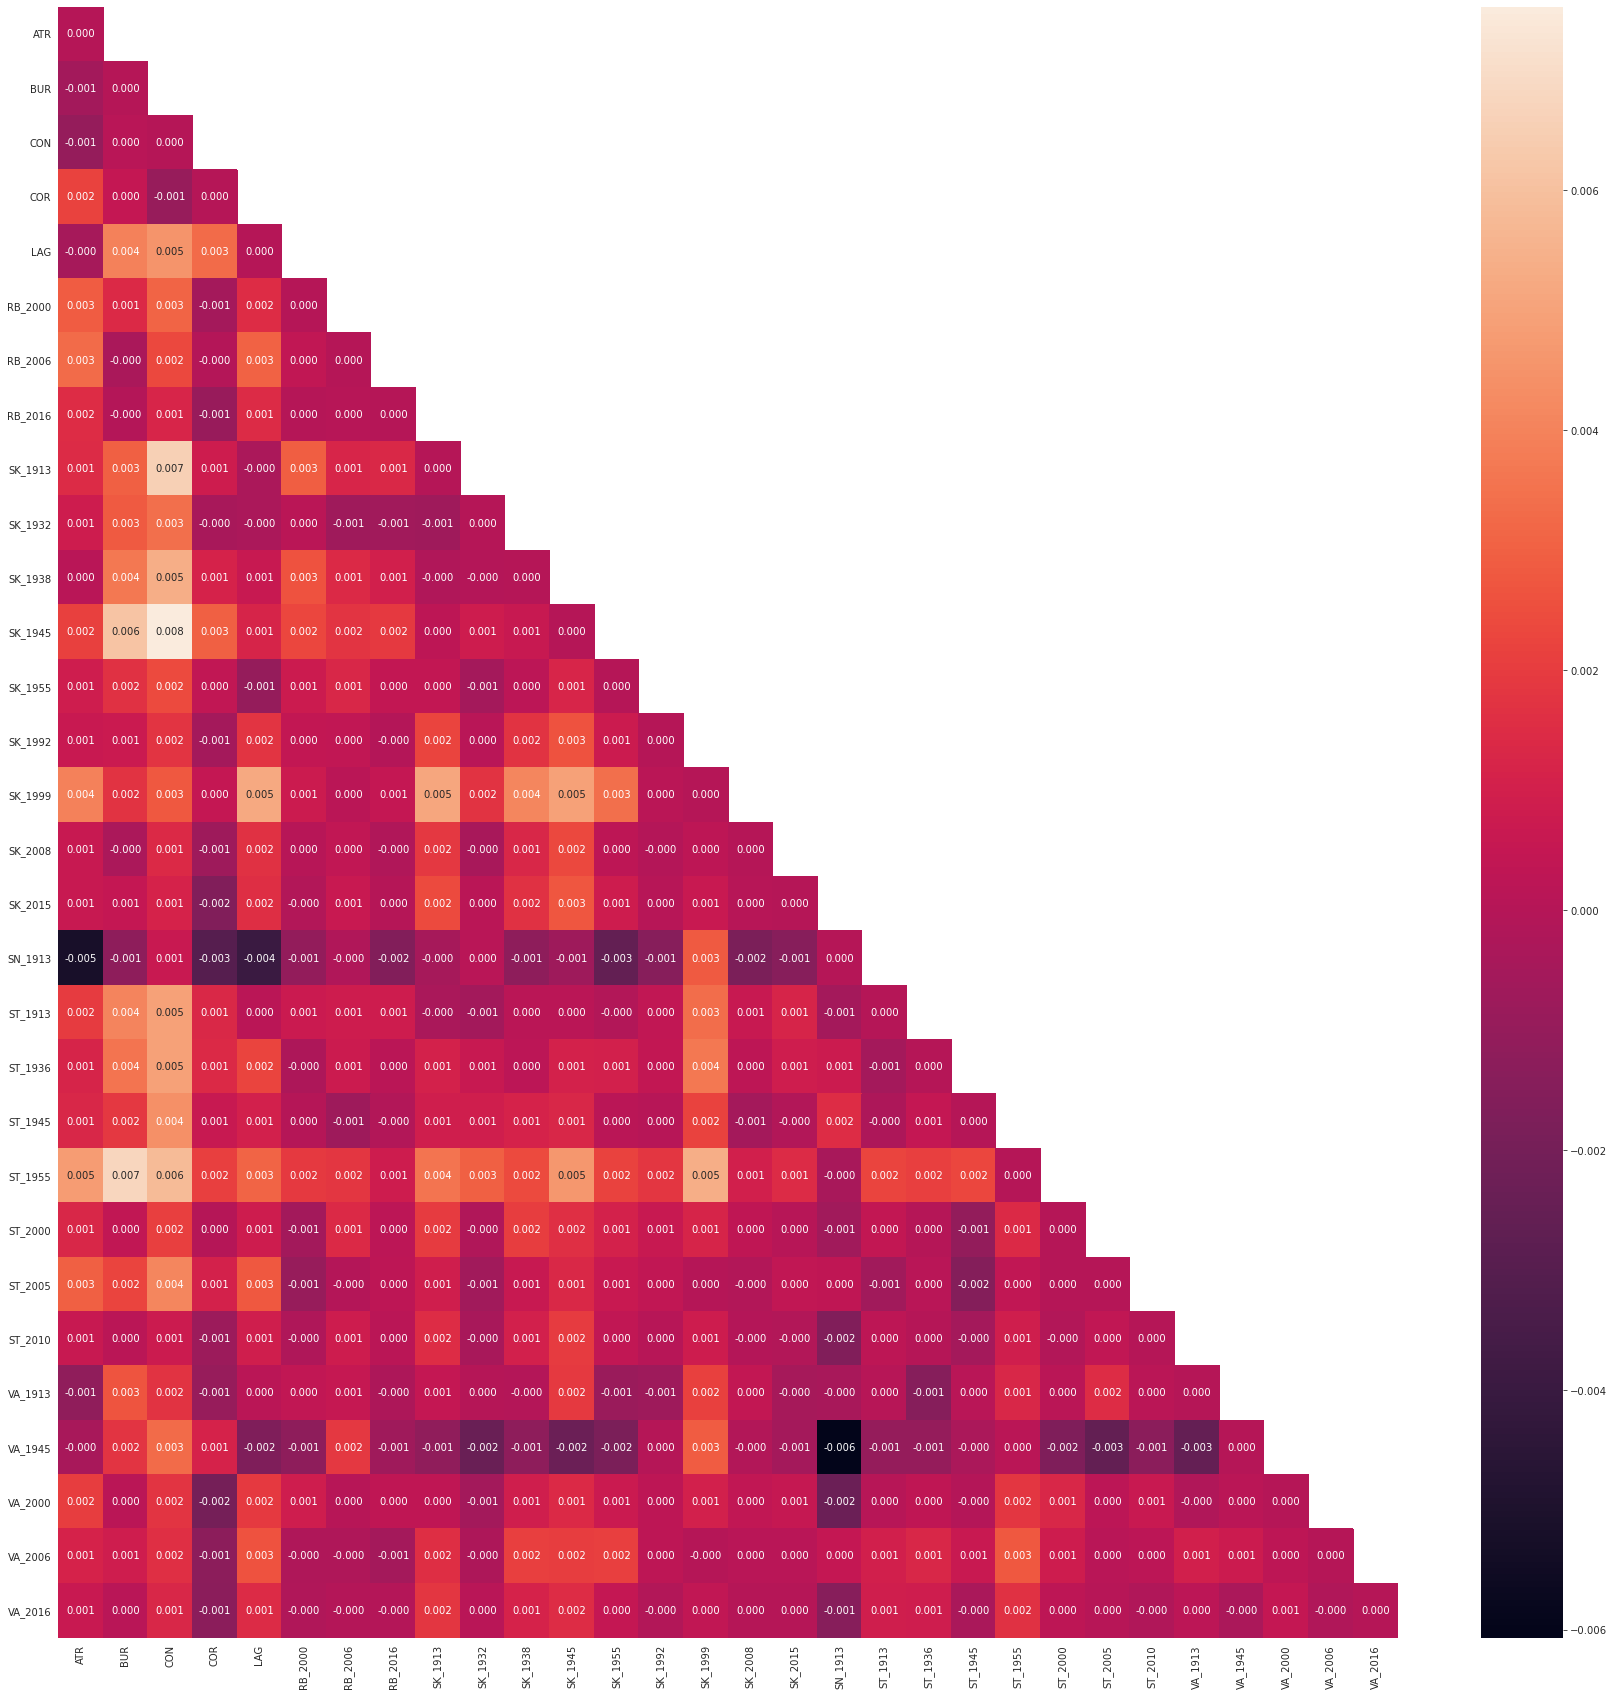

In [73]:
mask = np.zeros_like(Fst_dataframe-Fst_dataframe_2)
mask[np.triu_indices_from(Fst_dataframe-Fst_dataframe_2,1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,30))
    ax = sns.heatmap(Fst_dataframe-Fst_dataframe_2, annot=True, fmt=".3f", mask=mask)
plt.yticks(rotation=0)
plt.xticks(rotation=90)